In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure2', exist_ok=True)

# Load raw_data

In [3]:
# TE metadata in 1st step
Dfam_RM_family = pd.read_csv('../data/TE/TE_metadata_1st.csv')
Dfam_RM_family.index = Dfam_RM_family['repeat subfamily name']
Dfam_RM_family_dict = Dfam_RM_family.to_dict()

TE_class_list = ['DNA', 'ERV/LTR', 'ERV/Int', 'LINE', 'SINE', 'Retroposon']
Dfam_RM_family_fil = Dfam_RM_family[Dfam_RM_family['repeat class'].isin(TE_class_list)]
print(len(Dfam_RM_family_fil))

1170


In [4]:
# TE annotation in 1st step
Dfam_RM_1st_step = pd.read_csv('../data/TE/TE_annotation_1st.csv')
Dfam_RM_1st_step_fil = Dfam_RM_1st_step[Dfam_RM_1st_step['repeat adjusted cluster name'].isna()==False].copy()
Dfam_RM_1st_step_fil.head()

,repeat chr,repeat start,repeat end,repeat name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,repeat class,...,repeat alignment length,repeat no alignment length,repeat consequence length,repeat alignment ratio,repeat no alignment ratio,repeat length filtering,repeat zerocoverage filtering,repeat filtering,repeat best cluster name,repeat adjusted cluster name
13,chr1,30343,30532,MER53_chr1_dup1,1007,-,MER53,MER53,MER53_4,DNA,...,186,3,193,0.963731,0.015544,True,True,True,MER53_4,MER53_4
30,chr1,38256,39464,MLT1F-int_chr1_dup1,1791/2518,+,MLT1-int,MLT1F-int,MLT1F-int,ERV/LTR,...,1192,16,1489,0.800537,0.010745,True,True,True,MLT1-int_1,MLT1-int_2
46,chr1,46553,46722,MER45A_chr1_dup1,689,+,MER45,MER45A,MER45A,DNA,...,168,1,178,0.943820,0.005618,True,True,True,MER45_0,MER45_0
54,chr1,60379,60686,MER47A_chr1_dup1,1452,-,MER47,MER47A,MER47A,DNA,...,307,0,366,0.838798,0.000000,True,True,True,MER47_0,MER47_1
128,chr1,109836,110009,FAM_chr1_dup1,938,-,FAM,FAM,FAM_4,SINE,...,168,5,185,0.908108,0.027027,True,True,True,FAM_1,FAM_4


In [10]:
# summary of subfamily classification
score_df = pd.read_csv('../data/subfamily classification/clustering_summary.csv')
score_df.head()

,repeat family name,subfamily count,score,best_K,adjusted_K,silhouettes,repeat class
0,5S,1.0,NaN,NaN,NaN,NaN,rRNA
1,7SK,1.0,NaN,NaN,NaN,NaN,snRNA
2,7SLRNA,1.0,NaN,2.0,2.0,0.582791,SINE
3,ACRO1,1.0,NaN,NaN,NaN,NaN,Satellite
4,ALR,3.0,0.03739,NaN,NaN,NaN,Satellite


## Supplementary Fig.2A

array([344, 189])

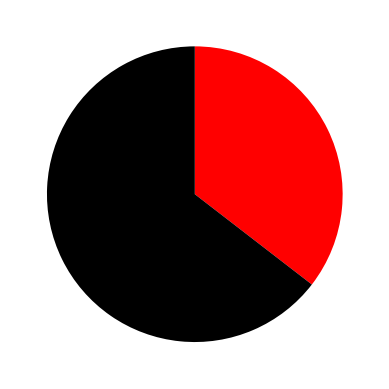

In [6]:
# with subfamily classification?

fig = plt.figure()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

count = Dfam_RM_family_fil['repeat family name'].value_counts()
data = (count>=2).value_counts()

value = [data[True], data[False]]

plt.pie(value, counterclock=False, startangle=90, colors=['red', 'black'])

plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2A.pdf', bbox_inches='tight', transparent=True, dpi=300)

data.values

## Supplementary Fig.2B

SignificanceResult(statistic=0.6590025359943342, pvalue=1.530188083536186e-21)


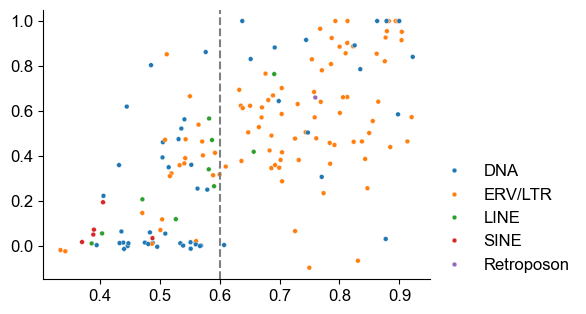

In [11]:
# clusteirng similarity
plt.figure(figsize=[5, 3.5])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

TE_class_list = ['LINE', 'SINE', 'DNA', 'ERV/LTR', 'Retroposon']
data = score_df[score_df['repeat class'].isin(TE_class_list)].dropna()
x = data['silhouettes']
y = data['score']
hue = data['repeat class']
hue_order = ['DNA', 'ERV/LTR', 'LINE', 'SINE', 'Retroposon']

p = sns.scatterplot(x=x, y=y, hue=hue, hue_order=hue_order, s=12)
plt.vlines(0.6, -0.15, 1.05, colors='grey', linestyles='dashed')

print(spearmanr(x, y))


plt.ylim(-0.15, 1.05)
plt.legend(loc=[1.02, 0])
#plt.xlabel('the average sihouette coefficient')
#plt.ylabel('ARI score')
plt.xlabel('')
plt.ylabel('')

p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.legend(frameon=False, loc=[1.00, 0])

plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2B.pdf', bbox_inches='tight', transparent=True, dpi=300)


## Supplementary Fig.2C

59 174


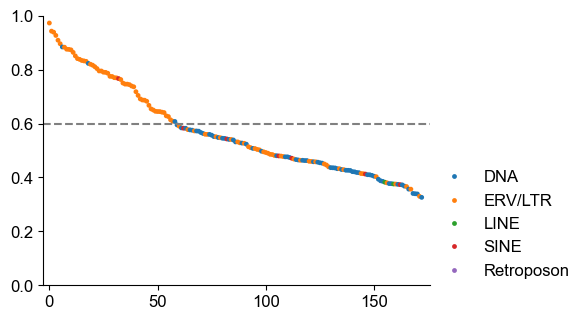

In [12]:
# the average silhouettes efficient of TE families without subfamily classification 
plt.figure(figsize=[5, 3.5])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = score_df[(score_df['score'].isna()) & (score_df['repeat class'].isin(TE_class_list))].sort_values(by='silhouettes', ascending=False)

x = range(len(data))
y = data['silhouettes']
hue = data['repeat class']
hue_order = ['DNA', 'ERV/LTR', 'LINE', 'SINE', 'Retroposon']

p = sns.scatterplot(x=x, y=y, hue=hue, hue_order=hue_order, s=12, linewidth=0)
plt.hlines(0.6, -3, len(data)+2, colors='grey', linestyles='dashed')

print(len(data[data['silhouettes']>0.6]), len(data))

plt.xlim(-3, len(data)+2)
plt.ylim(0, 1)

plt.legend(loc=[1.02, 0])
#plt.xlabel('rank')
#plt.ylabel('average of sihouette coefficient')
plt.xlabel('')
plt.ylabel('')


p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.legend(frameon=False, loc=[1.00, 0])

plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2C.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2C.pdf', bbox_inches='tight', transparent=True, dpi=300)


## Supplementary Fig.2D

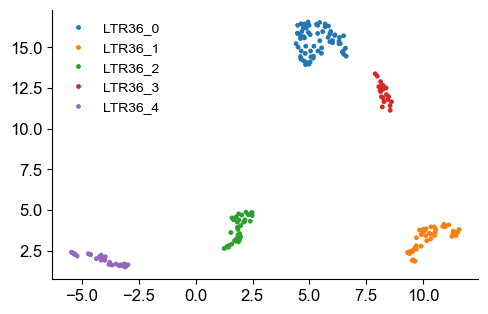

In [13]:
# LTR36
fig = plt.figure(figsize=[5.5, 3.5])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

family = 'LTR36'
data = Dfam_RM_1st_step_fil[Dfam_RM_1st_step_fil['repeat family name']==family]
UMAP = pd.read_csv('../data/subfamily classification/{}_trimming99_UMAP.csv'.format(family))
x = UMAP['UMAP_1']
y = UMAP['UMAP_2']
hue = data['repeat adjusted cluster name'].values
hue_order = sorted(pd.unique(hue))

p = sns.scatterplot(x=x, y=y, hue=hue, hue_order=hue_order, s=12, linewidth=0)

p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)
plt.legend(fontsize=10, frameon=False)

plt.xlabel('')
plt.ylabel('')

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2D.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure2/Supplementary Figure2D.pdf', bbox_inches='tight', transparent=True, dpi=300)